In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load Heart Disease UCI dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Merge into one DataFrame
df = pd.concat([X, y], axis=1)

print("Shape:", df.shape)
df.head()


Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
# Check missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [8]:
# Impute numerical (median), categorical (most frequent)
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

imputer_num = SimpleImputer(strategy="median")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

if cat_cols:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("✅ Missing values handled")

✅ Missing values handled


In [19]:

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Shape after encoding
print("Shape after encoding:", df_encoded.shape)

# Preview first 5 rows
df_encoded.head()

Shape after encoding: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose scaler (StandardScaler or MinMaxScaler)
scaler = StandardScaler()

scaled_array = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns)

print("✅ Features scaled")
df_scaled.head()

✅ Features scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,-0.764198


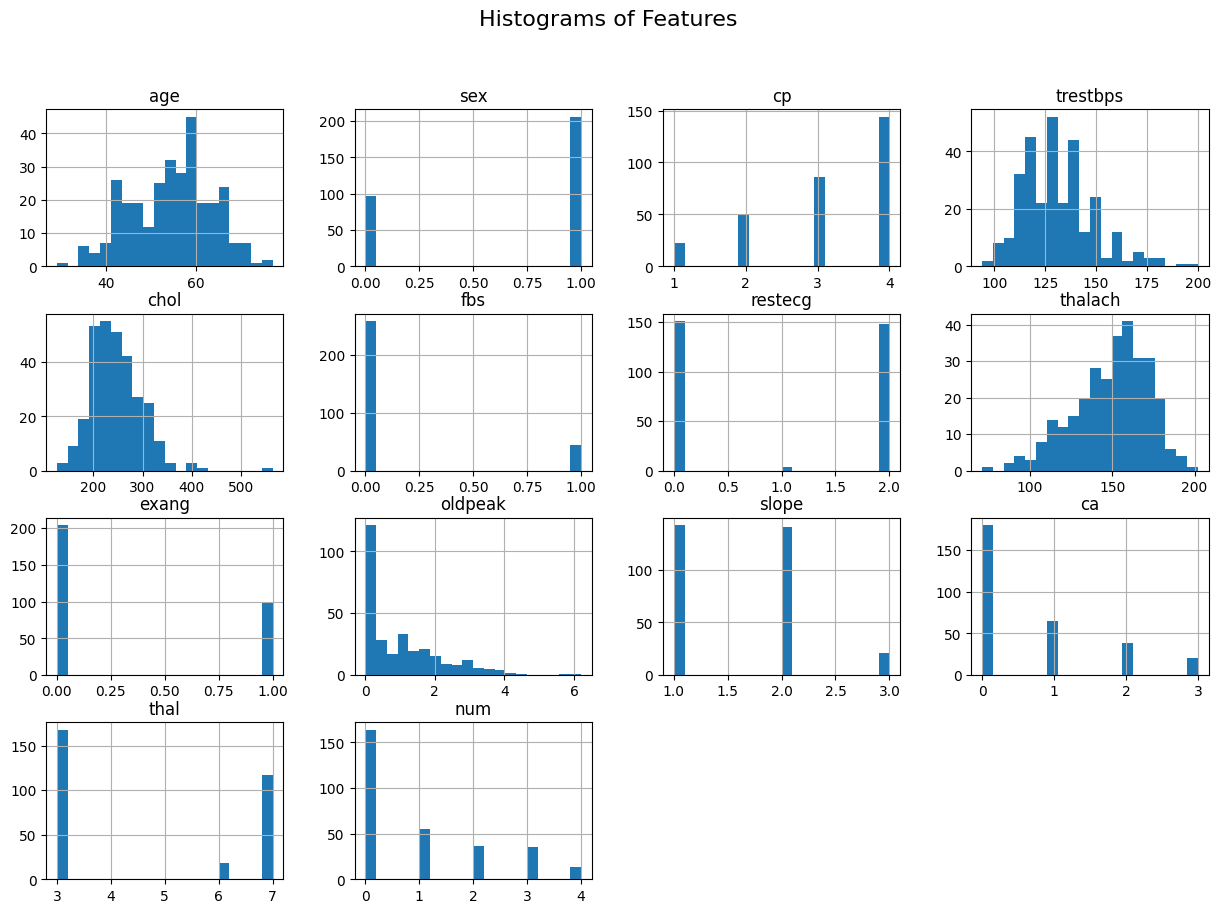

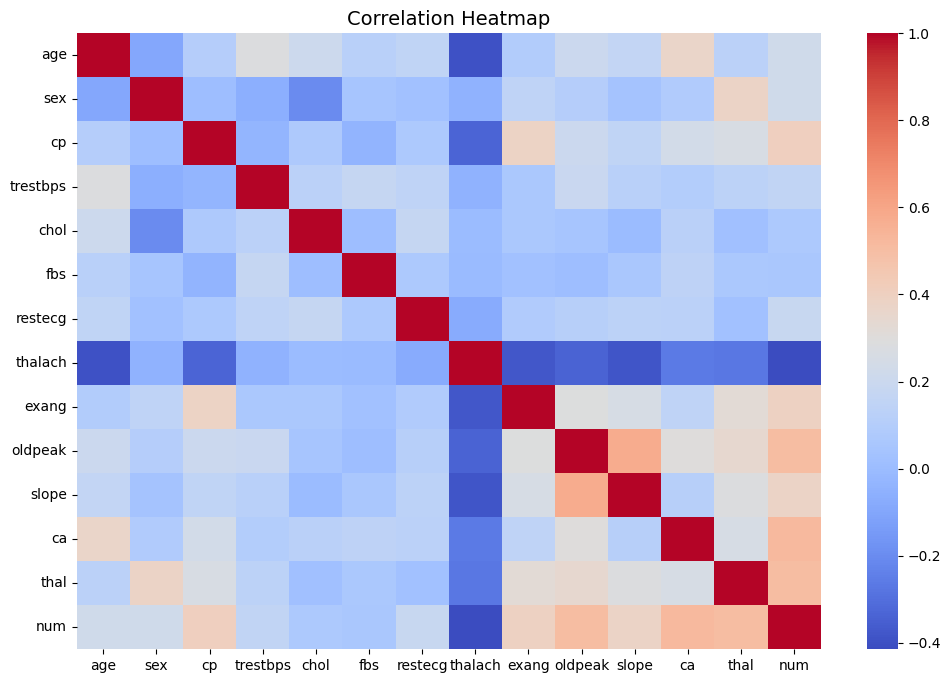

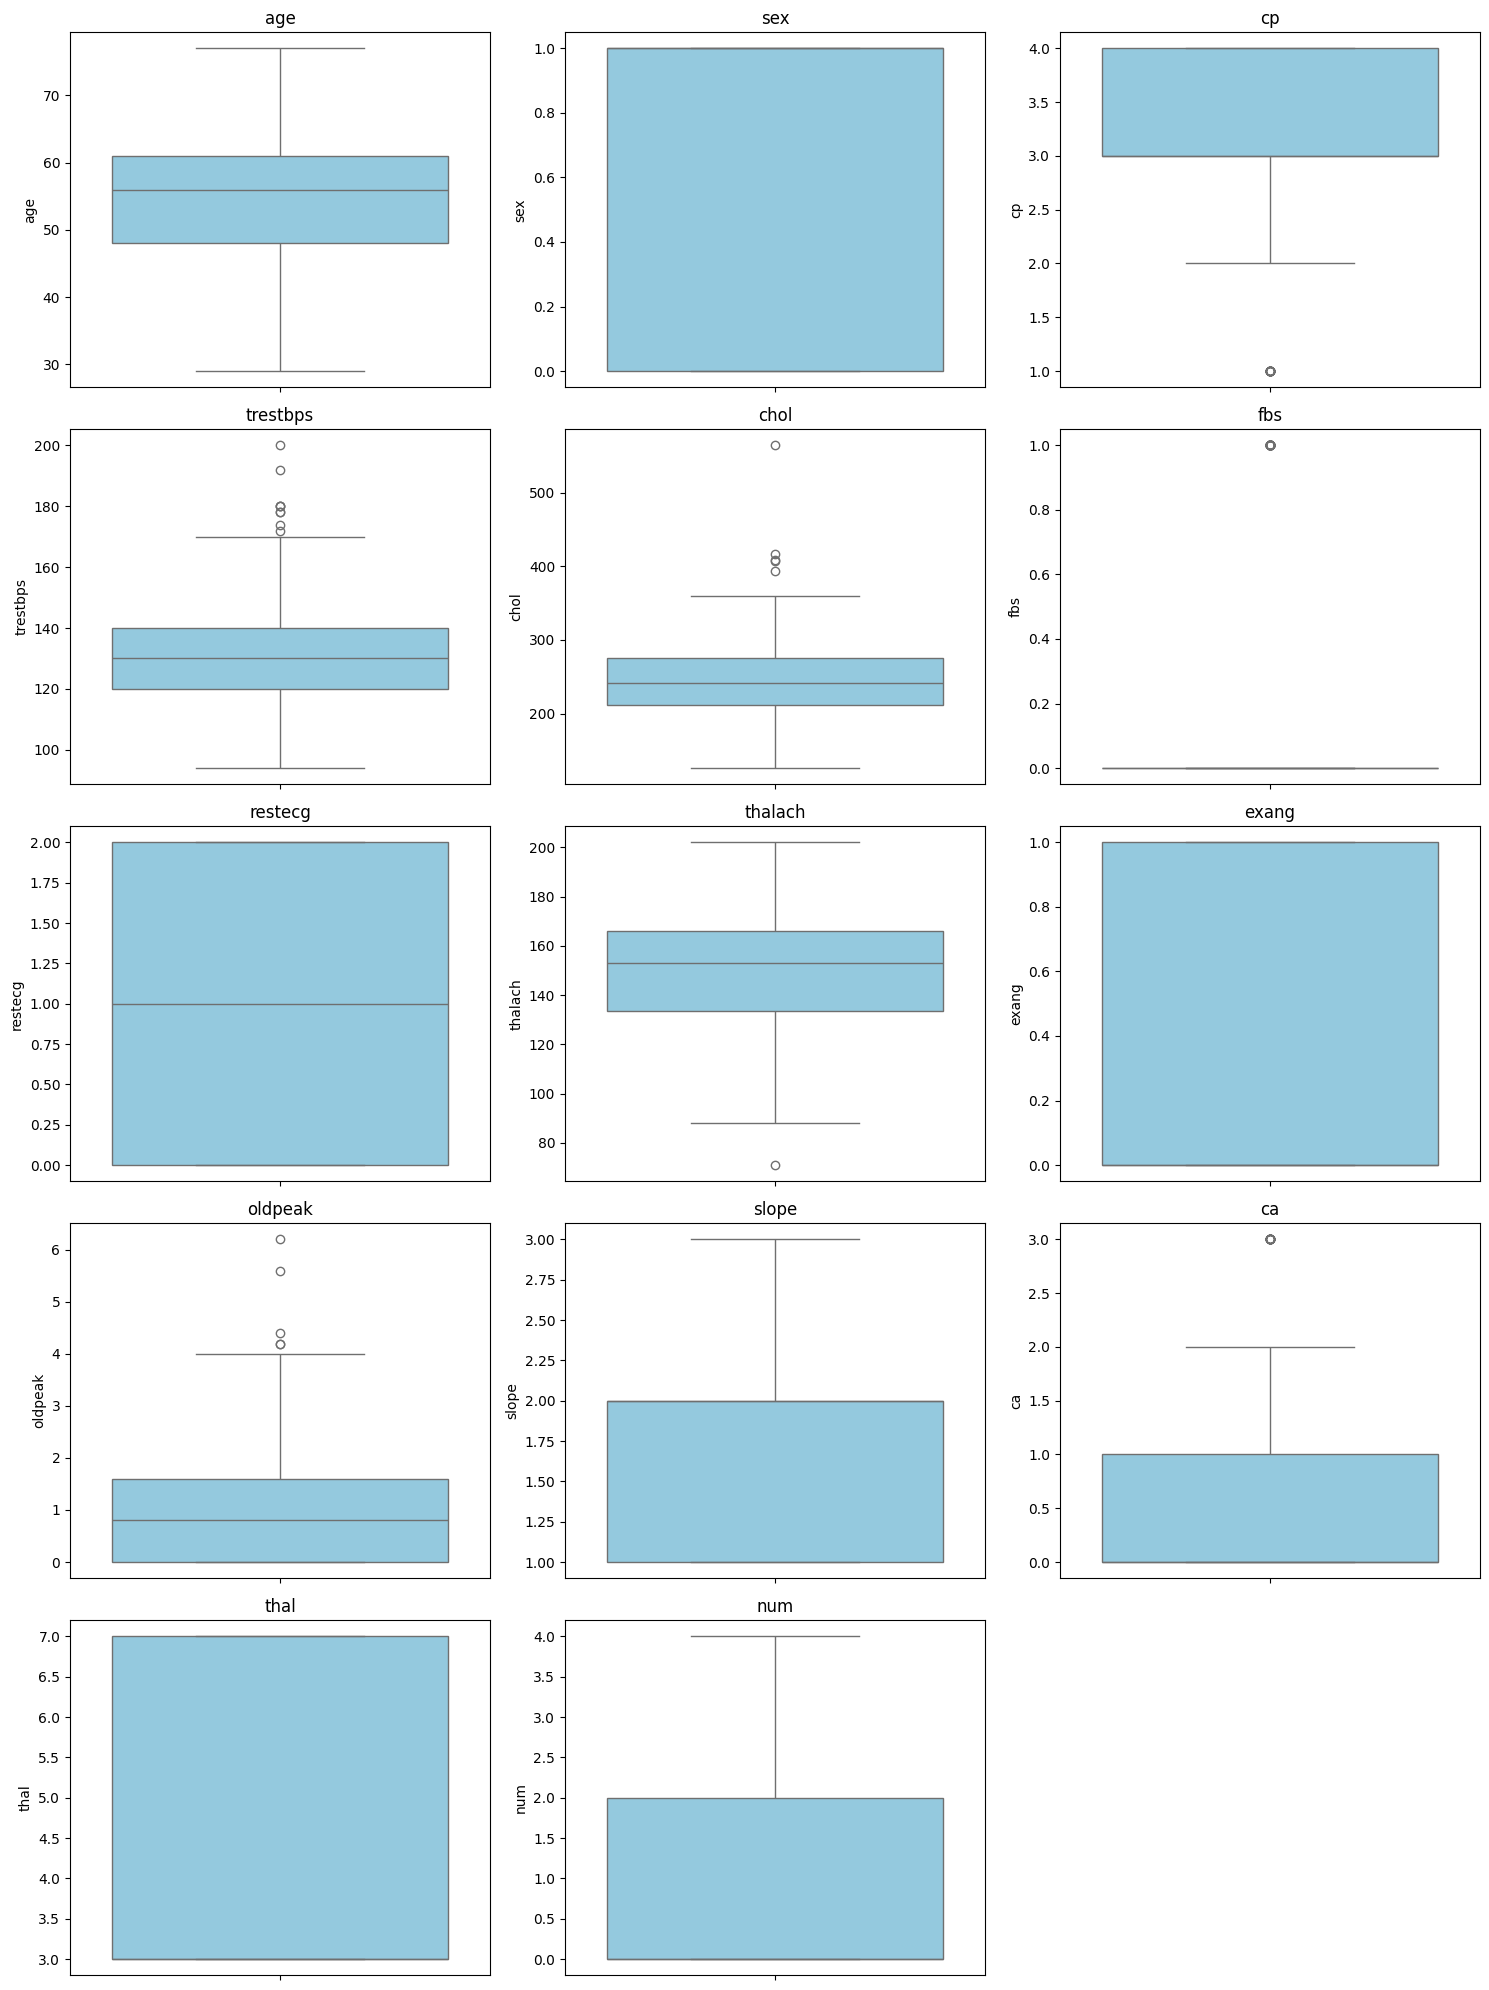

In [12]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Boxplots for numeric variables
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

n_cols = 3  # number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
from google.colab import files

# Save the cleaned dataset in Colab's temporary storage
output_path = "heart_disease_cleaned.csv"
df_scaled.to_csv(output_path, index=False)

# Download the dataset to your local computer
files.download(output_path)

print(f"✅ Cleaned dataset saved as {output_path} and ready for download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Cleaned dataset saved as heart_disease_cleaned.csv and ready for download!
